In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
subset_no = 10000
directory = 'Dillards POS/'
trans_file_path = directory + 'transaction.csv'

In [3]:
columns = ['sku', 'storeid', 'register', 'trannum', 'interID', 'saledate', 'stype', 'quantity',
                 'orgprice', 'amt', 'seq', 'mic', 'unkown']

In [4]:
# Count the total number of rows in the CSV file (optional but recommended)
total_rows = sum(1 for line in open(trans_file_path, 'r'))

# Number of random rows you want to select
num_random_rows = total_rows

if subset_no == True:
    num_random_rows = subset_no
    

# Calculate the random row indices to skip
skip_rows = sorted(random.sample(range(1, total_rows + 1), total_rows - num_random_rows))

# Read n random rows from the CSV file
trans = pd.read_csv(trans_file_path, skiprows=skip_rows, header=None)

In [5]:
trans.columns = columns

In [6]:
trans = trans.head(1000000)

In [7]:
trans['stype'].nunique()

2

In [8]:
trans.groupby('stype').count()['sku']

stype
P    926624
R     73376
Name: sku, dtype: int64

In [9]:
trans.groupby(['saledate', 'stype']).count()['sku']

saledate    stype
2004-08-01  P        1622
            R         131
2004-08-02  P        1599
            R         137
2004-08-03  P        2184
                     ... 
2005-08-25  R         239
2005-08-26  P        3401
            R         273
2005-08-27  P        5301
            R         297
Name: sku, Length: 778, dtype: int64

In [10]:
def get_year(x):
    return x[:4]

def get_month(x):
    return x[5:7]

def get_day(x):
    return x[-2:]

In [11]:
trans['year'] = trans['saledate'].apply(get_year)

In [12]:
trans['month'] = trans['saledate'].apply(get_month)

In [13]:
trans['day'] = trans['saledate'].apply(get_day)

In [14]:
trans.head()

,sku,storeid,register,trannum,interID,saledate,stype,quantity,orgprice,amt,seq,mic,unkown,year,month,day
0,3,202,290,1100,326708721,2005-01-18,P,1,440.0,30.0,3500000,818,0,2005,01,18
1,3,202,540,2700,326708721,2005-01-29,R,1,440.0,30.0,15200000,818,0,2005,01,29
2,3,303,500,2100,23702074,2004-08-18,P,1,440.0,12.0,4600000,48,0,2004,08,18
3,3,709,360,500,0,2005-08-14,P,1,440.0,30.0,6500000,818,0,2005,08,14
4,3,802,660,400,0,2005-08-09,P,1,440.0,30.0,4700000,599,0,2005,08,09


In [15]:
sub_year = trans.groupby(['year', 'stype']).count().reset_index()
sub_year = sub_year[['year', 'stype', 'sku']]
sub_year

,year,stype,sku
0,2004,P,363086
1,2004,R,26863
2,2005,P,563538
3,2005,R,46513


In [16]:
# Percentage
year_percentage = sub_year.pivot(index='year', columns='stype', values='sku')
year_percentage['percentage_P'] = (year_percentage['P'] / year_percentage.sum(axis=1)) * 100
year_percentage['percentage_R'] = (year_percentage['R'] / year_percentage.sum(axis=1)) * 100

In [17]:
year_percentage

stype,P,R,percentage_P,percentage_R
year,,,,
2004,363086,26863,93.111150,6.887205
2005,563538,46513,92.375555,7.623290


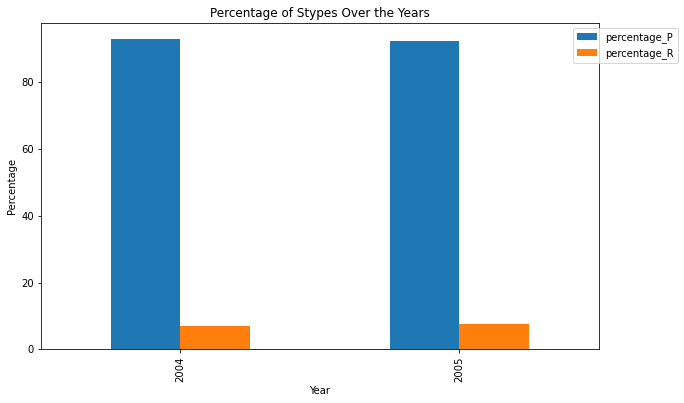

In [18]:
year_percentage[['percentage_P', 'percentage_R']].plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Percentage of Stypes Over the Years')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

In [21]:
sub_month = trans.groupby(['month', 'stype']).count().reset_index()
sub_month = sub_month[['month', 'stype', 'sku']]
sub_month

,month,stype,sku
0,01,P,65668
1,01,R,6323
2,02,P,84324
3,02,R,6238
4,03,P,66398
5,03,R,5989
6,04,P,75969
7,04,R,5319
8,05,P,58276
9,05,R,5462


In [26]:
temp = trans.groupby(['month']).count().reset_index()
temp = temp[['month', 'sku']]
month_percentage = pd.merge(sub_month, temp, on = 'month', how = 'left')
month_percentage['percentage'] = month_percentage['sku_x'] * 100 / month_percentage['sku_y']
month_percentage = month_percentage[['month', 'stype', 'percentage']]
month_percentage

,month,stype,percentage
0,01,P,91.216958
1,01,R,8.783042
2,02,P,93.111901
3,02,R,6.888099
4,03,P,91.726415
5,03,R,8.273585
6,04,P,93.456599
7,04,R,6.543401
8,05,P,91.430544
9,05,R,8.569456


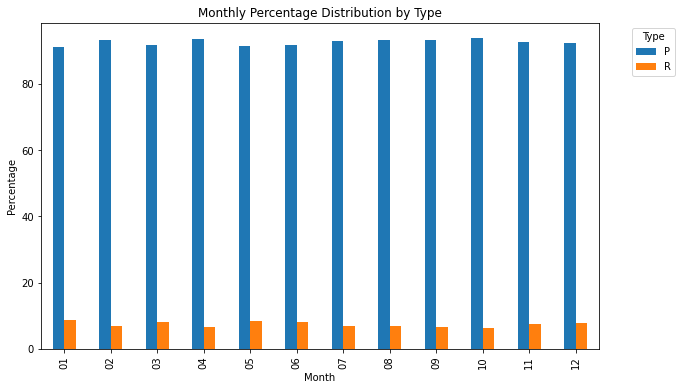

In [27]:
pivot = month_percentage.pivot(index='month', columns='stype', values='percentage')

# Plotting
pivot.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Monthly Percentage Distribution by Type')
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [29]:
sub_day = trans.groupby(['day', 'stype']).count().reset_index()
sub_day = sub_day[['day', 'stype', 'sku']]
sub_day

,day,stype,sku
0,01,P,28172
1,01,R,2327
2,02,P,30873
3,02,R,2639
4,03,P,26572
...,...,...,...
57,29,R,2416
58,30,P,32704
59,30,R,2508
60,31,P,12633


In [33]:
temp = trans.groupby(['day']).count().reset_index()
temp = temp[['day', 'sku']]
day_percentage = pd.merge(sub_day, temp, on = 'day', how = 'left')
day_percentage['percentage'] = day_percentage['sku_x'] * 100 / day_percentage['sku_y']
day_percentage = day_percentage[['day', 'stype', 'percentage']]
day_percentage

,day,stype,percentage
0,01,P,92.370242
1,01,R,7.629758
2,02,P,92.125209
3,02,R,7.874791
4,03,P,91.855642
...,...,...,...
57,29,R,7.663273
58,30,P,92.877428
59,30,R,7.122572
60,31,P,90.461869


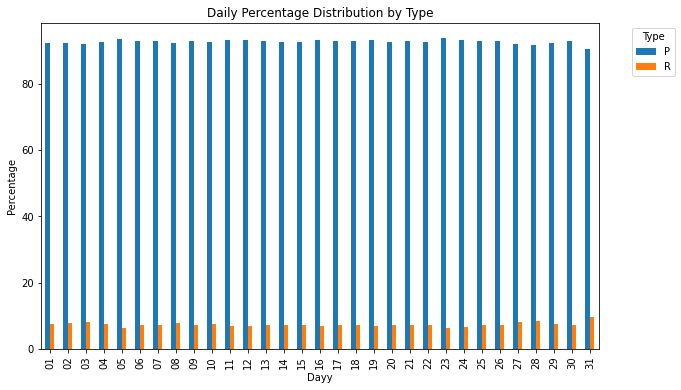

In [34]:
pivot = day_percentage.pivot(index='day', columns='stype', values='percentage')

# Plotting
pivot.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Daily Percentage Distribution by Type')
plt.xlabel('Dayy')
plt.ylabel('Percentage')
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [35]:
def season(x):
    if x in ["03", '04', '05']:
        return "Spring"
    elif x in ['06', '07', '08']:
        return "Summer"
    elif x in ['09', '10', '11']:
        return "Fall"
    else:
        return "Winter"

In [36]:
trans['season'] = trans['month'].apply(season)
trans.head()

,sku,storeid,register,trannum,interID,saledate,stype,quantity,orgprice,amt,seq,mic,unkown,year,month,day,season
0,3,202,290,1100,326708721,2005-01-18,P,1,440.0,30.0,3500000,818,0,2005,01,18,Winter
1,3,202,540,2700,326708721,2005-01-29,R,1,440.0,30.0,15200000,818,0,2005,01,29,Winter
2,3,303,500,2100,23702074,2004-08-18,P,1,440.0,12.0,4600000,48,0,2004,08,18,Summer
3,3,709,360,500,0,2005-08-14,P,1,440.0,30.0,6500000,818,0,2005,08,14,Summer
4,3,802,660,400,0,2005-08-09,P,1,440.0,30.0,4700000,599,0,2005,08,09,Summer


In [37]:
sub_season = trans.groupby(['season', 'stype']).count().reset_index()
sub_season = sub_season[['season', 'stype', 'sku']]
sub_season

,season,stype,sku
0,Fall,P,204711
1,Fall,R,14710
2,Spring,P,200643
3,Spring,R,16770
4,Summer,P,279852
5,Summer,R,21678
6,Winter,P,241418
7,Winter,R,20218


In [38]:
temp = trans.groupby(['season']).count().reset_index()
temp = temp[['season', 'sku']]
season_percentage = pd.merge(sub_season, temp, on = 'season', how = 'left')
season_percentage['percentage'] = season_percentage['sku_x'] * 100 / season_percentage['sku_y']
season_percentage = season_percentage[['season', 'stype', 'percentage']]
season_percentage

,season,stype,percentage
0,Fall,P,93.295993
1,Fall,R,6.704007
2,Spring,P,92.286570
3,Spring,R,7.713430
4,Summer,P,92.810666
5,Summer,R,7.189334
6,Winter,P,92.272470
7,Winter,R,7.727530


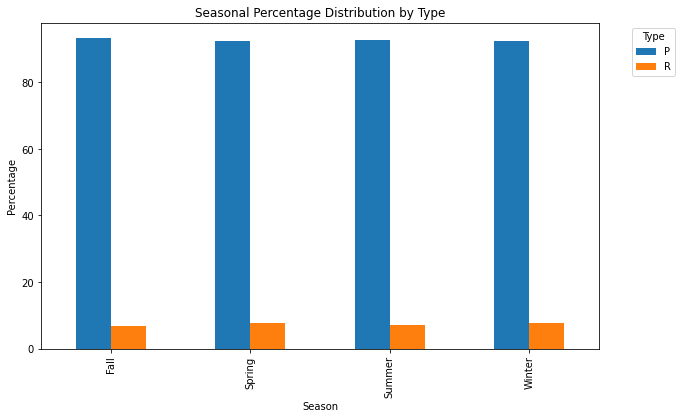

In [39]:
pivot = season_percentage.pivot(index='season', columns='stype', values='percentage')

# Plotting
pivot.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Seasonal Percentage Distribution by Type')
plt.xlabel('Season')
plt.ylabel('Percentage')
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [40]:
def day_of_week(x):
    date_obj = datetime.strptime(x, '%Y-%m-%d')
    week_day = date_obj.weekday()
    if week_day == 0:
        return 'Monday'
    elif week_day == 1:
        return 'Tuesday'
    elif week_day == 2:
        return 'Wednesday'
    elif week_day == 3:
        return 'Thursday'
    elif week_day == 4:
        return 'Friday'
    elif week_day == 5:
        return 'Saturday'
    else:
        return 'Sunday'

In [41]:
trans['Day_of_Week'] = trans['saledate'].apply(day_of_week)
trans.head()

,sku,storeid,register,trannum,interID,saledate,stype,quantity,orgprice,amt,seq,mic,unkown,year,month,day,season,Day_of_Week
0,3,202,290,1100,326708721,2005-01-18,P,1,440.0,30.0,3500000,818,0,2005,01,18,Winter,Tuesday
1,3,202,540,2700,326708721,2005-01-29,R,1,440.0,30.0,15200000,818,0,2005,01,29,Winter,Saturday
2,3,303,500,2100,23702074,2004-08-18,P,1,440.0,12.0,4600000,48,0,2004,08,18,Summer,Wednesday
3,3,709,360,500,0,2005-08-14,P,1,440.0,30.0,6500000,818,0,2005,08,14,Summer,Sunday
4,3,802,660,400,0,2005-08-09,P,1,440.0,30.0,4700000,599,0,2005,08,09,Summer,Tuesday


In [42]:
sub_day_of_week = trans.groupby(['Day_of_Week', 'stype']).count().reset_index()
sub_day_of_week = sub_day_of_week[['Day_of_Week', 'stype', 'sku']]
sub_day_of_week

,Day_of_Week,stype,sku
0,Friday,P,156092
1,Friday,R,11144
2,Monday,P,98564
3,Monday,R,10354
4,Saturday,P,214052
5,Saturday,R,12899
6,Sunday,P,103394
7,Sunday,R,8790
8,Thursday,P,126866
9,Thursday,R,10263


In [44]:
temp = trans.groupby(['Day_of_Week']).count().reset_index()
temp = temp[['Day_of_Week', 'sku']]
day_of_week_percentage = pd.merge(sub_day_of_week, temp, on = 'Day_of_Week', how = 'left')
day_of_week_percentage['percentage'] = day_of_week_percentage['sku_x'] * 100 / day_of_week_percentage['sku_y']
day_of_week_percentage = day_of_week_percentage[['Day_of_Week', 'stype', 'percentage']]
day_of_week_percentage

,Day_of_Week,stype,percentage
0,Friday,P,93.336363
1,Friday,R,6.663637
2,Monday,P,90.493766
3,Monday,R,9.506234
4,Saturday,P,94.316394
5,Saturday,R,5.683606
6,Sunday,P,92.164658
7,Sunday,R,7.835342
8,Thursday,P,92.515806
9,Thursday,R,7.484194


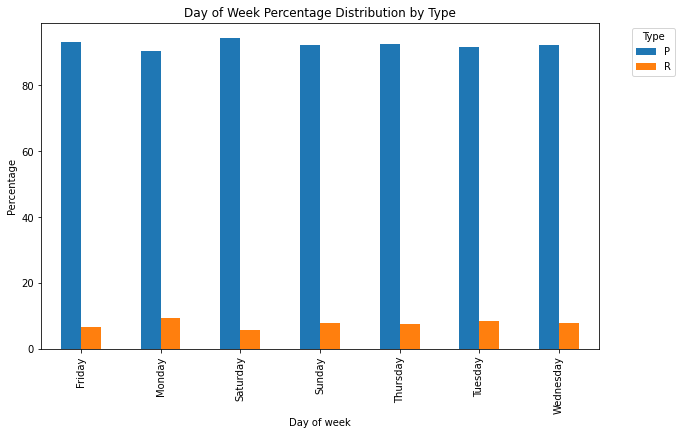

In [46]:
pivot = day_of_week_percentage.pivot(index='Day_of_Week', columns='stype', values='percentage')

# Plotting
pivot.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Day of Week Percentage Distribution by Type')
plt.xlabel('Day of week')
plt.ylabel('Percentage')
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()